In [91]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt


In [92]:
df = pd.read_csv('/content/nn.csv')
X = np.array(df.iloc[:,:4])
print("X is\n", X)
print(X.shape)

y = np.array(df.iloc[:,4:]).T
y = np.array([y]).T
print("y is\n", y)


X is
 [[5.00e+00 2.50e+00 3.65e+03 2.00e+00]
 [3.00e+00 2.00e+00 1.93e+03 1.00e+00]
 [4.00e+00 2.50e+00 1.94e+03 1.00e+00]
 ...
 [3.00e+00 1.50e+00 1.62e+03 1.00e+00]
 [4.00e+00 2.00e+00 1.51e+03 1.00e+00]
 [3.00e+00 1.75e+00 9.60e+02 1.00e+00]]
(1764, 4)
y is
 [[[3]]

 [[1]]

 [[1]]

 ...

 [[1]]

 [[1]]

 [[1]]]


In [93]:
n = len(df)
temp = y
one_hot_labels = np.zeros((n, 3))
for i in range(n):
    one_hot_labels[i, int(y[i])-1] = 1
y = one_hot_labels
print("y after one-hot-encoding is\n",y)


y after one-hot-encoding is
 [[0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [94]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=4)
print(f"Shape of train set is {X_train.shape}")
print(f"Shape of test set is {X_test.shape}")
print(f"Shape of train label is {y_train.shape}")
print(f"Shape of test label is {y_test.shape}")

Shape of train set is (1181, 4)
Shape of test set is (583, 4)
Shape of train label is (1181, 3)
Shape of test label is (583, 3)


In [95]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [96]:
from tensorflow import keras
NB_CLASSES=3

In [97]:

import tensorflow as tf
model = tf.keras.models.Sequential()

In [98]:

model.add(keras.layers.Dense(3,         
                        input_shape=(4,), 
                        name='Hidden-Layer-1', 
                        activation='relu'))    


In [99]:

model.add(keras.layers.Dense(NB_CLASSES,
                             name='Output-Layer',
                             activation='softmax'))

In [100]:

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [101]:

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 3)                 15        
                                                                 
 Output-Layer (Dense)        (None, 3)                 12        
                                                                 
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________


In [102]:
 
history=model.fit(X_train,
          y_train,
          epochs=5)

Epoch 1/5
37/37 [==============================] - 1s 2ms/step - loss: 1.1484 - accuracy: 0.7976
Epoch 2/5
37/37 [==============================] - 0s 2ms/step - loss: 1.0481 - accuracy: 0.8036
Epoch 3/5
37/37 [==============================] - 0s 2ms/step - loss: 0.9612 - accuracy: 0.8036
Epoch 4/5
37/37 [==============================] - 0s 2ms/step - loss: 0.8848 - accuracy: 0.8036
Epoch 5/5
37/37 [==============================] - 0s 2ms/step - loss: 0.8204 - accuracy: 0.8036



Accuracy during Training :
------------------------------------


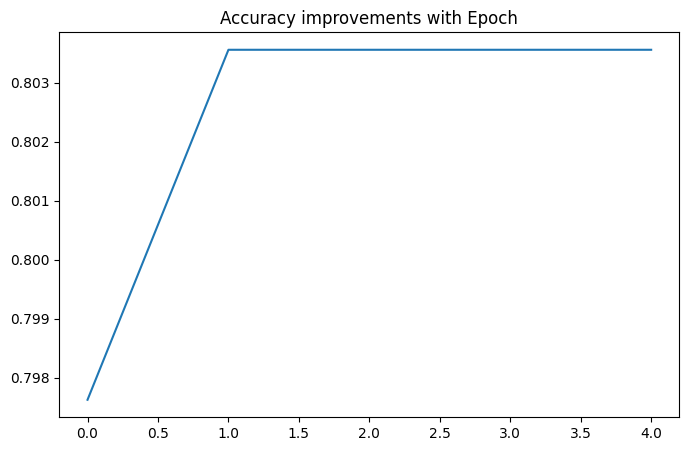

In [103]:
print("\nAccuracy during Training :\n------------------------------------")
import matplotlib.pyplot as plt

pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()

In [104]:

print("\nEvaluation against Test Dataset :\n")
model.evaluate(X_test,y_test)


Evaluation against Test Dataset :
------------------------------------
19/19 [==============================] - 0s 2ms/step - loss: 0.7755 - accuracy: 0.8165


[0.7755314707756042, 0.8164665699005127]

19/19 [==============================] - 0s 1ms/step


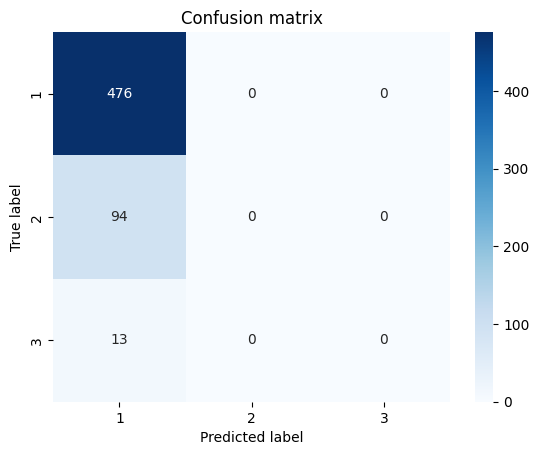

In [105]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['1', '2', '3'], yticklabels=['1', '2', '3'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.show()
